# Pricing Derivatives Using Black-Scholes-Merton Model

Rafiq Islam  
2023-11-12

## Introduction

In this blog, we will explore how to price simple equity derivatives
using the Black-Scholes-Merton (BSM) model. We will derive the
mathematical formula and then provide Python code to implement it.

### Background and Preliminaries

Before proceeding to the deep of the discussion, we need to know some
definition and terminology

**Brownian Motion:** Brownian motion is a concept with definitions and
applications across various disciplines, named after the botanist Robert
Brown, is the random, erratic movement of particles suspended in a fluid
(liquid or gas) due to their collisions with the fast-moving molecules
of the fluid.

*Brownian motion is a stochastic process $(B_t)_{t \geq 0}$ defined as a
continuous-time process with the following properties:*

-   $B_0 = 0$ almost surely.
-   $B_t$ has independent increments.
-   For $t > s$, $B_t - B_s \sim N(0, t-s)$ (normally distributed with
    mean 0 and variance $t-s$).
-   $B_t$ has continuous paths almost surely.

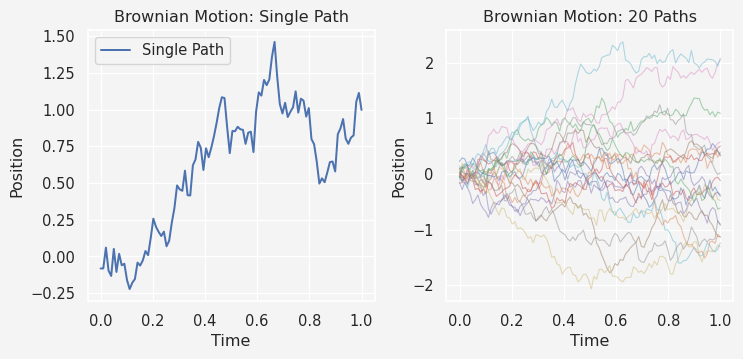

In [1]:
from mywebstyle import plot_style
plot_style('#f4f4f4')
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_steps = 100  # Number of steps
n_paths = 20   # Number of paths
time_horizon = 1  # Total time
dt = time_horizon / n_steps  # Time step
t = np.linspace(0, time_horizon, n_steps)  # Time array

# Generate Brownian motion
def generate_brownian_paths(n_paths, n_steps, dt):
    # Standard normal increments scaled by sqrt(dt)
    increments = np.random.normal(0, np.sqrt(dt), (n_paths, n_steps))
    # Cumulative sum to generate paths
    return np.cumsum(increments, axis=1)

# Generate one path and multiple paths
single_path = generate_brownian_paths(1, n_steps, dt)[0]
multiple_paths = generate_brownian_paths(n_paths, n_steps, dt)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(7.9, 3.9))

# Single path
axes[0].plot(t, single_path, label="Single Path")
axes[0].set_title("Brownian Motion: Single Path")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Position")
axes[0].legend()

# Multiple paths
for path in multiple_paths:
    axes[1].plot(t, path, alpha=0.5, linewidth=0.8)
axes[1].set_title(f"Brownian Motion: {n_paths} Paths")
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Position")

plt.tight_layout()
plt.show()

**Geometric Brownian Motion (GBM)**  
A stochastic process $S_t$ is said to follow a geometric Brownian motion
if it satisfies the following equation:  
$$
dS_t = \mu S_t dt+\sigma S_t dB_t
$$

Which can be written as  
$$
S_t - S_0 =\int_0^t \mu S_u du + \int_0^t \sigma S_u dB_u
$$

To solve the GBM, we apply Ito’s formula to the function
$Z_t = f(t, S_t)= \ln(S_t)$ and then by Taylor’s expansion, we have

By definition we have

The term $(dt)^2$ is negligible compared to the term $dt$ and it is also
assume that the product $dtdB_t$ is negligible. Furthermore, the
quadratic variation of $B_t$ i.e., $(dB_t)^2= dt$. With these values, we
obtain

with $Z_0=\ln S_0$. Now we have the following  

## Black-Scholes-Merton Formula

Now we are ready to derive the BSM PDE. The payoff of an *option*
$V(S,T)$ at maturity is is known. To find the value at an earlier stage,
we need to know how V behaves as a function of $S$ and $t$. By Ito’s
lemma we have

Now let’s consider a portfolio consisting of a short one option and long
$\frac{\partial V}{\partial S}$ shares at time $t$. The value of this
portfolio is

$$
\Pi = -V+\frac{\partial V}{\partial S}S
$$

over the time $[t,t+\Delta t]$, the total profit or loss from the
changes in the values of the portfolio is $$
\Delta \Pi = -\Delta V + \frac{\partial V}{\partial S}\Delta S
$$

Now by the discretization we have,

At this point, if $r$ is the risk-free interest rate then we will have
following relationship $$
r\Pi \Delta t = \Delta \Pi 
$$

The rationale of this relation is that no-aribtrage assumption. Thus, we
have  

This is the famous Black-Scholes-Merton PDF, formally written with the
boundary conditions as follows

This Black-Scholes-Merton PDE can be reduced to the heat equation using
the substitutions $S = K e^x$,
$t = T - \frac{\tau}{\frac{1}{2} \sigma^2}$, and
$c(S, t) = K v(x, \tau)$. Let’s derive the solution step by step in full
mathematical detail and show how this leads to the normal CDF.

#### Step 1: Substitutions

We aim to reduce the BSM PDE: $$
\frac{\partial c}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 c}{\partial S^2} + r S \frac{\partial c}{\partial S} - r c = 0
$$

to the heat equation. Using the substitutions:

-   $S = K e^x$, where $x = \ln(S / K)$, and $S \in (0, \infty)$ maps
    $x \in (-\infty, \infty)$,
-   $t = T - \frac{\tau}{\frac{1}{2} \sigma^2}$, so
    $\tau = \frac{1}{2} \sigma^2 (T - t)$,
-   $c(S, t) = K v(x, \tau)$, where $v(x, \tau)$ is the transformed
    function.

#### Step 2: Derivative Transformations

For $c(S, t) = K v(x, \tau)$, we compute derivatives.

1.  The first derivative of $c$ with respect to $S$: $$
    \frac{\partial c}{\partial S} = \frac{\partial}{\partial S} \big(K v(x, \tau)\big) = K \frac{\partial v}{\partial x} \frac{\partial x}{\partial S},
    $$ where $x = \ln(S / K)$ implies
    $\frac{\partial x}{\partial S} = \frac{1}{S}$. Thus: $$
    \frac{\partial c}{\partial S} = K \frac{\partial v}{\partial x} \frac{1}{S}.
    $$

2.  The second derivative of $c$ with respect to $S$: $$
    \frac{\partial^2 c}{\partial S^2} = \frac{\partial}{\partial S} \left( K \frac{\partial v}{\partial x} \frac{1}{S} \right).
    $$ Using the product rule: $$
    \frac{\partial^2 c}{\partial S^2} = K \frac{\partial^2 v}{\partial x^2} \frac{1}{S^2} - K \frac{\partial v}{\partial x} \frac{1}{S^2}.
    $$

3.  The time derivative: $$
    \frac{\partial c}{\partial t} = K \frac{\partial v}{\partial \tau} \frac{\partial \tau}{\partial t}, \quad \text{and } \frac{\partial \tau}{\partial t} = -\frac{1}{\frac{1}{2} \sigma^2}.
    $$

#### Step 3: Transforming the PDE

Substituting the above derivatives into the BSM PDE, we rewrite each
term.

1.  For $\frac{\partial c}{\partial t}$: $$
    \frac{\partial c}{\partial t} = -\frac{1}{\frac{1}{2} \sigma^2} K \frac{\partial v}{\partial \tau}.
    $$

2.  For $\frac{\partial c}{\partial S}$: $$
    S \frac{\partial c}{\partial S} = S \cdot \left(K \frac{\partial v}{\partial x} \frac{1}{S}\right) = K \frac{\partial v}{\partial x}.
    $$

3.  For $\frac{\partial^2 c}{\partial S^2}$: $$
    \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 c}{\partial S^2} = \frac{1}{2} \sigma^2 S^2 \left(K \frac{\partial^2 v}{\partial x^2} \frac{1}{S^2} - K \frac{\partial v}{\partial x} \frac{1}{S^2}\right) = \frac{1}{2} \sigma^2 K \frac{\partial^2 v}{\partial x^2}.
    $$

Substituting all these into the BSM PDE: $$
-\frac{1}{\frac{1}{2} \sigma^2} K \frac{\partial v}{\partial \tau} + \frac{1}{2} \sigma^2 K \frac{\partial^2 v}{\partial x^2} + r K \frac{\partial v}{\partial x} - r K v = 0.
$$

Divide through by $K$: $$
-\frac{\partial v}{\partial \tau} + \frac{\partial^2 v}{\partial x^2} + \frac{2r}{\sigma^2} \frac{\partial v}{\partial x} - \frac{2r}{\sigma^2} v = 0.
$$

To simplify, let $v(x, \tau) = e^{\alpha x + \beta \tau} u(x, \tau)$,
where $\alpha$ and $\beta$ are constants. Substituting and choosing
$\alpha = -\frac{r}{\sigma^2}$ and $\beta = -\frac{r^2}{2 \sigma^2}$,
the equation reduces to: $$
\frac{\partial u}{\partial \tau} = \frac{\partial^2 u}{\partial x^2}.
$$

#### Step 4: Solving the Heat Equation

The heat equation
$\frac{\partial u}{\partial \tau} = \frac{\partial^2 u}{\partial x^2}$
has a well-known solution using Fourier methods: $$
u(x, \tau) = \frac{1}{\sqrt{2 \pi \tau}} \int_{-\infty}^\infty e^{-\frac{(x-y)^2}{2\tau}} f(y) \, dy,
$$

where $f(y)$ is the initial condition.

For the BSM problem, the initial condition is the payoff: $$
f(y) = \max(e^y - 1, 0).
$$

Performing the integration leads to the final solution involving the
cumulative normal distribution function: $$
v(x, \tau) = N(d_1) - e^{-x} N(d_2),
$$

where: $$
d_1 = \frac{x + \frac{1}{2} \tau}{\sqrt{\tau}}, \quad d_2 = \frac{x - \frac{1}{2} \tau}{\sqrt{\tau}}.
$$

Transforming back to the original variables gives the Black-Scholes
formula: $$
C(S, t) = S e^{-q(T-t)} N(d_1) - K e^{-r(T-t)} N(d_2),
$$ where: $$
d_1 = \frac{\ln(S / K) + (r - q + \frac{\sigma^2}{2})(T-t)}{\sigma \sqrt{T-t}}, \quad d_2 = d_1 - \sigma \sqrt{T-t}.
$$

Similarly, we can derive the price of a European put option:

$$
P = K e^{-rT} N(-d_2) - S e^{-qT} N(-d_1)
$$

Where: $$
d_1 = \frac{\ln(\frac{S}{K}) + (r - q + \frac{\sigma^2}{2})T}{\sigma \sqrt{T}}, \quad d_2 = d_1 - \sigma \sqrt{T}
$$

### Asymptotic Behavior of the BSM formula for call and put options

What if $K\rightarrow 0$? In that case,

1.  $\ln(S_0/K)\rightarrow \infty$, causing $d_1 \rightarrow \infty$ and
    $d_2 \rightarrow \infty$  
2.  The cdf $N(d_1)\rightarrow 1$ and $N(d_2)\rightarrow 1$  
3.  The second term $Ke^{-rT}N(d_2)\rightarrow 0$ as $K\rightarrow 0$

In this case, the price of a call option $C\rightarrow S_0$ and the
price of a put option $P \rightarrow 0$

## Greeks: Delta and Gamma

**Delta** ($\Delta$) is the sensitivity of the option price to changes
in the underlying asset price:

$$
\Delta = \frac{\partial C}{\partial S}\approx \frac{C(S_0 + h) - C(S_0 - h)}{2h}
$$

This is the **central difference approximation**, which provides a more
accurate estimate of delta compared to the forward or backward
difference methods.

-   $C(S_0 + h)$: Calculate the option price with the spot price
    increased by $h$.
-   $C(S_0 - h)$: Calculate the option price with the spot price
    decreased by $h$.

**Gamma** ($\Gamma$) measures the rate of change of delta with respect
to the underlying asset price:

$$
\Gamma = \frac{\partial^2 C}{\partial S^2}\approx \frac{\Delta(S_0 + h) - \Delta(S_0 - h)}{2h}\approx \frac{C(S_0 + h) - 2C(S_0) + C(S_0 - h)}{h^2}
$$

Gamma ($\Gamma$) measures the rate of change of delta ($\Delta$) with
respect to the underlying spot price ($S_0$).

-   $C(S_0 + h)$: Option price with the spot price increased by $h$.
-   $C(S_0)$: Option price at the current spot price.
-   $C(S_0 - h)$: Option price with the spot price decreased by $h$.

**Relationship Between Delta and Gamma:**

-   Gamma represents how much delta changes for a small change in $S_0$.
-   If gamma is high, delta is more sensitive to changes in $S_0$, which
    is important for hedging strategies.

## Implementation

### Notation

-   $S$: Spot price of the stock.
-   $K$: Strike price of the option.
-   $T$: Time to maturity (in years).
-   $r$: Risk-free rate (continuously compounded).
-   $q$: Dividend yield (continuously compounded).
-   $\sigma$: Volatility of the stock.
-   $N(\cdot)$: Cumulative distribution function of the standard normal
    distribution.

In [2]:
from dataclasses import dataclass
import numpy as np
from scipy.stats import norm

@dataclass
class Equity:
    spot: float
    dividend_yield: float
    volatility: float

@dataclass
class EquityOption:
    strike: float
    time_to_maturity: float
    put_call: str

@dataclass
class EquityForward:
    strike: float
    time_to_maturity: float

def bsm(underlying: Equity, option: EquityOption, rate: float) -> float:
    S = underlying.spot
    K = option.strike
    T = option.time_to_maturity
    r = rate
    q = underlying.dividend_yield
    sigma = underlying.volatility

    # Handle edge case where strike is effectively zero
    if K < 1e-8:
        if option.put_call.lower() == "call":
            return S 
        else:
            return 0.0

    d1 = (np.log(S / K) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option.put_call.lower() == "call":
        price = S * np.exp(-q * T) * norm.cdf(d1) \
                - K * np.exp(-r * T) * norm.cdf(d2)
    elif option.put_call.lower() == "put":
        price = K * np.exp(-r * T) * norm.cdf(-d2) \
                - S * np.exp(-q * T) * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Must be 'call' or 'put'.")

    return price

def delta(underlying: Equity, option: EquityOption, rate: float) -> float:
    bump = 0.01 * underlying.spot
    bumped_up = Equity(spot=underlying.spot + bump, 
                       dividend_yield=underlying.dividend_yield, 
                       volatility=underlying.volatility)
    bumped_down = Equity(spot=underlying.spot - bump, 
                         dividend_yield=underlying.dividend_yield, 
                         volatility=underlying.volatility)
    price_up = bsm(bumped_up, option, rate)
    price_down = bsm(bumped_down, option, rate)
    return (price_up - price_down) / (2 * bump)

def gamma(underlying: Equity, option: EquityOption, rate: float) -> float:
    bump = 0.01 * underlying.spot
    bumped_up = Equity(spot=underlying.spot + bump, 
                       dividend_yield=underlying.dividend_yield, 
                       volatility=underlying.volatility)
    bumped_down = Equity(spot=underlying.spot - bump, 
                         dividend_yield=underlying.dividend_yield, 
                         volatility=underlying.volatility)
    original_price = bsm(underlying, option, rate)
    price_up = bsm(bumped_up, option, rate)
    price_down = bsm(bumped_down, option, rate)
    return (price_up - 2 * original_price + price_down) / (bump**2)

def fwd(underlying: Equity, forward: EquityForward, rate: float) -> float:
    S = underlying.spot
    K = forward.strike
    T = forward.time_to_maturity
    r = rate
    q = underlying.dividend_yield
    forward_price = S * np.exp((r - q) * T) - K

    return forward_price

def check_put_call_parity(
    underlying: Equity, 
    call_option: EquityOption, 
    put_option: EquityOption, 
    rate: float
    ) -> bool:

    call_price = bsm(underlying, call_option, rate)
    put_price = bsm(underlying, put_option, rate)
    S = underlying.spot
    K = call_option.strike
    T = call_option.time_to_maturity
    r = rate
    q = underlying.dividend_yield

    parity_lhs = call_price - put_price
    parity_rhs = S * np.exp(-q * T) - K * np.exp(-r * T)

    return np.isclose(parity_lhs, parity_rhs, atol=1e-4)

### Example Usage

Say, we want to price a call option on an equity with spot price
$S_0 = 450$ with dividend yield $q=1.4\%$, and volatility $14\%$. The
strike price of the call is $K=470$, with time to maturity in years
$T=0.23$ and the risk free rate $r = 0.05$.<br> <br> Next, we want to
see the asymptotic behavior of the call option if the strike price
$K\rightarrow 0$ with interest rate 0.<br> <br> Next, we want to price a
put option on the same equity but strike price $K=500$, time to maturity
in years $T=0.26$ and interest rate is 0.<br> <br> Finally, we want to
check if the put-call parity relationship is hold. <br> <br> In each
case, we consider $h=0.01$ a bump or small change in the stock price.

In [3]:
if __name__ == "__main__":
    eq = Equity(450, 0.014, 0.14)
    option_call = EquityOption(470, 0.23, "call")
    option_put = EquityOption(500, 0.26, "put")
    
    print(bsm(eq, option_call, 0.05))  
    print(bsm(eq, EquityOption(1e-15, 0.26, "call"), 0.0))  
    print(bsm(Equity(450, 0.0, 1e-9), option_put, 0.0))  

    # Check put-call parity
    eq = Equity(450, 0.015, 0.15)
    option_call = EquityOption(470, 0.26, "call")
    option_put = EquityOption(470, 0.26, "put")
    print(check_put_call_parity(eq, option_call, option_put, 0.05)) 

5.834035584709966
450
50.0
True

## References

-   Karatzas, I., & Shreve, S. E. (1991). *Brownian Motion and
    Stochastic Calculus*.  
-   Options, Futures, and Other Derivatives by John C. Hull  
-   Arbitrage Theory in Continuous Time Book by Tomas Björk

**Share on**

<a href="https://www.facebook.com/sharer.php?u=https://mrislambd.github.io/jobandintern/optionprice/" target="_blank" style="color:#1877F2; text-decoration: none;">

</a>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https://mrislambd.github.io/jobandintern/optionprice/" target="_blank" style="color:#0077B5; text-decoration: none;">

</a>

<a href="https://www.twitter.com/intent/tweet?url=https://mrislambd.github.io/jobandintern/optionprice/" target="_blank" style="color:#1DA1F2; text-decoration: none;">

</a>

**You may also like**